Best Learning Rate: 0.1
Best Regularization Parameter: 0.001
Best R² Score: 0.9977855698781359


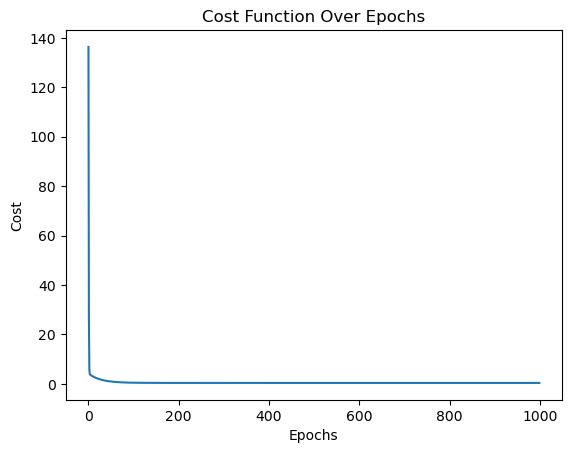

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Generate dataset
np.random.seed(42)
n_samples = 1000

# Generate 7 highly correlated features using multivariate normal distribution
mean = np.zeros(7)
cov = np.array([
    [1, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9],
    [0.9, 1, 0.9, 0.9, 0.9, 0.9, 0.9],
    [0.9, 0.9, 1, 0.9, 0.9, 0.9, 0.9],
    [0.9, 0.9, 0.9, 1, 0.9, 0.9, 0.9],
    [0.9, 0.9, 0.9, 0.9, 1, 0.9, 0.9],
    [0.9, 0.9, 0.9, 0.9, 0.9, 1, 0.9],
    [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1]
])

X = np.random.multivariate_normal(mean, cov, n_samples)
true_coefficients = np.array([3, 2, -1, 5, 4, -2, 1])
y = X @ true_coefficients + np.random.normal(0, 0.5, n_samples)  # Linear relation with some noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Normalize the features to prevent overflow
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Ridge Regression using Gradient Descent

def ridge_regression(X, y, learning_rate, regularization_param, epochs):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []

    for epoch in range(epochs):
        y_pred = X @ theta
        residuals = y_pred - y
        
        # Calculate the gradient and clip it to prevent overflow
        gradient = (2/m) * (X.T @ residuals + regularization_param * theta)
        gradient = np.clip(gradient, -10, 10)  # Clipping gradients

        # Update theta
        theta -= learning_rate * gradient

        # Calculate cost and add regularization
        cost = (1/m) * np.sum(residuals**2) + regularization_param * np.sum(theta**2)
        cost_history.append(cost)

    return theta, cost_history

# 4. Define Hyperparameters
learning_rates = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]  # Smaller learning rates
regularization_params = [1e-15, 1e-10, 1e-5, 1e-3, 0, 1, 10, 20]
epochs = 1000

# 5. Find the best learning rate and regularization parameter

best_r2 = -float('inf')
best_params = (None, None)
best_theta = None

for lr in learning_rates:
    for reg_param in regularization_params:
        theta, cost_history = ridge_regression(X_train, y_train, lr, reg_param, epochs)
        
        # Calculate predictions and R2 score on test set
        y_test_pred = X_test @ theta
        
        # Ensure both y_test and y_test_pred are 1D arrays
        y_test_pred = y_test_pred.flatten()
        y_test = y_test.flatten()
        
        # Calculate R2 score
        r2 = r2_score(y_test, y_test_pred)
        
        # Track the best R2 score and parameters
        if r2 > best_r2:
            best_r2 = r2
            best_params = (lr, reg_param)
            best_theta = theta

# Output the best parameters and performance
print(f"Best Learning Rate: {best_params[0]}")
print(f"Best Regularization Parameter: {best_params[1]}")
print(f"Best R² Score: {best_r2}")

# Plot the cost history for the best combination
_, best_cost_history = ridge_regression(X_train, y_train, best_params[0], best_params[1], epochs)

plt.plot(range(epochs), best_cost_history)
plt.title('Cost Function Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()


In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
df = pd.read_csv('Hitters.csv')

# Fill NA values with 0
df.fillna(0, inplace=True)

# List of columns that should be of integer datatype
int_columns = ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 
               'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'Salary']

# Convert integer columns to int datatype
for col in int_columns:
    if df[col].dtype != 'int64':  # Check if the column is not already integer
        df[col] = df[col].astype(int)

# Label encode non-integer columns
label_encoder = LabelEncoder()

non_int_columns = ['League', 'Division', 'NewLeague']  # Columns to be label encoded
for col in non_int_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Check datatypes after conversion
print(df.dtypes)

# Save the modified dataframe back to CSV
df.to_csv('Hittlers_processed.csv', index=False)


AtBat        int64
Hits         int64
HmRun        int64
Runs         int64
RBI          int64
Walks        int64
Years        int64
CAtBat       int64
CHits        int64
CHmRun       int64
CRuns        int64
CRBI         int64
CWalks       int64
League       int32
Division     int32
PutOuts      int64
Assists      int64
Errors       int64
Salary       int32
NewLeague    int32
dtype: object


In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the CSV file
df = pd.read_csv('Hittlers_processed.csv')

# Fill NA values with 0
df.fillna(0, inplace=True)

# Separate input (features) and output (target)
# Assuming 'Salary' is the target/output feature
X = df.drop('Salary', axis=1)  # Input features
y = df['Salary']  # Output feature (target)

# Perform scaling on input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print scaled input features and output target
print("Scaled Input Features (X):")
print(X_scaled)

print("\nOutput Feature (y):")
print(y)


Scaled Input Features (X):
[[-0.57407148 -0.75512977 -1.12359063 ... -0.54092397  1.88089921
  -0.91079386]
 [-0.43043703 -0.43173229 -0.43357884 ... -0.46774014  0.308192
   1.09794328]
 [ 0.64029256  0.62469948  0.83144278 ... -0.1823232   0.93727488
  -0.91079386]
 ...
 [ 0.61417721  0.53846015 -0.8935867  ...  0.04454668 -0.16362016
  -0.91079386]
 [ 1.25400343  0.92653713 -0.20357491 ...  0.17627758  0.62273344
  -0.91079386]
 [ 1.63267609  1.48709276 -0.20357491 ... -0.75315708 -0.79270304
  -0.91079386]]

Output Feature (y):
0         0
1       475
2       480
3       500
4        91
       ... 
317     700
318     875
319     385
320     960
321    1000
Name: Salary, Length: 322, dtype: int64


In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('Hittlers_processed.csv')

# Fill NA values with 0
df.fillna(0, inplace=True)

# Separate input (features) and output (target)
X = df.drop('Salary', axis=1)  # Input features
y = df['Salary']  # Output feature

# Perform scaling on input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Fit Ridge Regression with regularization parameter (alpha = 0.5748)
ridge_model = Ridge(alpha=0.5748)
ridge_model.fit(X_train, y_train)

# Fit Lasso Regression with regularization parameter (alpha = 0.5748)
lasso_model = Lasso(alpha=0.5748)
lasso_model.fit(X_train, y_train)

# Print the coefficients and intercepts of each model
print("Linear Regression Coefficients:", linear_model.coef_)
print("Linear Regression Intercept:", linear_model.intercept_)

print("\nRidge Regression Coefficients:", ridge_model.coef_)
print("Ridge Regression Intercept:", ridge_model.intercept_)

print("\nLasso Regression Coefficients:", lasso_model.coef_)
print("Lasso Regression Intercept:", lasso_model.intercept_)

# Evaluate each model on the test data
print("\nLinear Regression Test Score:", linear_model.score(X_test, y_test))
print("Ridge Regression Test Score:", ridge_model.score(X_test, y_test))
print("Lasso Regression Test Score:", lasso_model.score(X_test, y_test))


Linear Regression Coefficients: [-296.84435881  285.06714831   72.19293328   -7.76811143  -33.7817076
  136.8210004   -41.13456872 -694.88959382  614.42668335  -11.92165065
  204.38641712  273.78544447 -177.01237125   64.70225219  -50.78517812
   21.12156989   54.40227502  -13.02670171  -24.30823945]
Linear Regression Intercept: 438.95926939721414

Ridge Regression Coefficients: [-315.7808893   303.56996083   62.80739111  -13.23641467  -21.19103736
  140.12914699  -66.26797319 -385.64864584  343.56500311  -15.22833898
  224.00968975  258.35341549 -198.94696394   60.47061357  -52.89768688
   22.54566902   48.32640113  -11.12163191  -21.2682908 ]
Ridge Regression Intercept: 438.8114850196884

Lasso Regression Coefficients: [-301.34571655  279.52952921   54.99868991   -0.          -11.68109368
  133.0292745   -54.2918838  -509.89697918  487.96448157    0.
  181.21479967  237.15392071 -177.03821615   57.60527269  -51.28895451
   21.10211614   48.16264947  -10.30983607  -18.0382708 ]
Lasso 

In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('Hittlers_processed.csv')

# Fill NA values with 0
df.fillna(0, inplace=True)

# Separate input (features) and output (target)
X = df.drop('Salary', axis=1)  # Input features
y = df['Salary']  # Output feature

# Perform scaling on input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Fit Ridge Regression with regularization parameter (alpha = 0.5748)
ridge_model = Ridge(alpha=0.5748)
ridge_model.fit(X_train, y_train)

# Fit Lasso Regression with regularization parameter (alpha = 0.5748)
lasso_model = Lasso(alpha=0.5748)
lasso_model.fit(X_train, y_train)

# Predictions for the test set
linear_pred = linear_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

# Evaluate the performance of each model
def evaluate_model(y_test, predictions, model_name):
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"--- {model_name} Performance ---")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R² Score: {r2}\n")

# Evaluate Linear Regression
evaluate_model(y_test, linear_pred, "Linear Regression")

# Evaluate Ridge Regression
evaluate_model(y_test, ridge_pred, "Ridge Regression")

# Evaluate Lasso Regression
evaluate_model(y_test, lasso_pred, "Lasso Regression")


--- Linear Regression Performance ---
Mean Squared Error (MSE): 181844.0514584579
Mean Absolute Error (MAE): 309.2291418780988
R² Score: 0.2594408856007425

--- Ridge Regression Performance ---
Mean Squared Error (MSE): 175957.18968471128
Mean Absolute Error (MAE): 303.8439081464637
R² Score: 0.283415104756064

--- Lasso Regression Performance ---
Mean Squared Error (MSE): 176932.6076000018
Mean Absolute Error (MAE): 303.95678857517953
R² Score: 0.27944271950769795



In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the Boston Housing dataset
df = pd.read_csv('Boston_Housing.csv')

# Separate input features and output target
X = df.drop('MEDV', axis=1)  # 'MEDV' is the target variable (house prices)
y = df['MEDV']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform scaling on input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of alphas for cross-validation
alphas = np.logspace(-6, 6, 13)

# Ridge Regression with Cross-Validation
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# Lasso Regression with Cross-Validation
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)

# Print the best alpha values
print(f"Best alpha for RidgeCV: {ridge_cv.alpha_}")
print(f"Best alpha for LassoCV: {lasso_cv.alpha_}")

# Make predictions on the test set
ridge_pred = ridge_cv.predict(X_test_scaled)
lasso_pred = lasso_cv.predict(X_test_scaled)

# Evaluate the models
def evaluate_model(y_test, predictions, model_name):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"--- {model_name} Performance ---")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R² Score: {r2}\n")

# Evaluate RidgeCV
evaluate_model(y_test, ridge_pred, "RidgeCV")

# Evaluate LassoCV
evaluate_model(y_test, lasso_pred, "LassoCV")


Best alpha for RidgeCV: 1.0
Best alpha for LassoCV: 1e-06
--- RidgeCV Performance ---
Mean Squared Error (MSE): 24.312903830491607
R² Score: 0.668462435964356

--- LassoCV Performance ---
Mean Squared Error (MSE): 24.291122840236397
R² Score: 0.6687594476459651

